In [62]:
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
protein='1fme'
summary_path = f'../{protein}/summary_batch1.h5'
timescales = pd.read_hdf(summary_path, key='timescales')
hp_definitions = pd.read_hdf('../../experiments/hpsample.h5', key='hyperparameters')
timescales.reset_index(inplace=True)
df = timescales.merge(hp_definitions, on=['hp_ix'], how='left')

In [55]:
df.query('lag==41').query('process==2').groupby('hp_ix')['count'].sum().min()

88

In [56]:
df.head()

,hp_ix,lag,process,median,lb,ub,count,cluster__max_iter,cluster__stride,tica__dim,tica__lag,tica__kinetic_map,tica__stride,cluster__k,feature__value,dihedrals__which,distances__scheme,distances__transform,distances__steepness,distances__centre
0,28,1,2,88.436288,67.390893,239.512382,100,1000,10,12,92,True,1,65,distances,NaN,ca,logistic,26.322045,1.40333
1,28,1,3,71.382123,42.631476,137.064099,100,1000,10,12,92,True,1,65,distances,NaN,ca,logistic,26.322045,1.40333
2,28,1,4,57.106879,36.863322,85.912190,100,1000,10,12,92,True,1,65,distances,NaN,ca,logistic,26.322045,1.40333
3,28,1,5,44.270007,24.197671,68.114134,100,1000,10,12,92,True,1,65,distances,NaN,ca,logistic,26.322045,1.40333
4,28,1,6,38.226849,19.972205,53.047827,100,1000,10,12,92,True,1,65,distances,NaN,ca,logistic,26.322045,1.40333


In [57]:
df.query('lag==41').query('process==2').groupby(['feature__value', 
                                                 'distances__transform',
                                                 'distances__scheme'],dropna=False).count()

hp_ix  lag  process  \
feature__value distances__transform distances__scheme                        
dihedrals      NaN                  NaN                   20   20       20   
distances      linear               ca                    20   20       20   
                                    closest-heavy         20   20       20   
               logistic             ca                    36   36       36   
                                    closest-heavy         40   40       40   

                                                       median  lb  ub  count  \
feature__value distances__transform distances__scheme                          
dihedrals      NaN                  NaN                    20  20  20     20   
distances      linear               ca                     20  20  20     20   
                                    closest-heavy          20  20  20     20   
               logistic             ca                     36  36  36     36   
                                    closest-heavy          40  40  40     40   

                                                       cluster__max_iter  \
feature__value distances__transform distances__scheme                      
dihedrals      NaN                  NaN                               20   
distances      linear               ca                                20   
                                    closest-heavy                     20   
               logistic             ca                                36   
                                    closest-heavy                     40   

                                                       cluster__stride  \
feature__value distances__transform distances__scheme                    
dihedrals      NaN                  NaN                             20   
distances      linear               ca                              20   
                                    closest-heavy                   20   
               logistic             ca                              36   
                                    closest-heavy                   40   

                                                       tica__dim  tica__lag  \
feature__value distances__transform distances__scheme                         
dihedrals      NaN                  NaN                       20         20   
distances      linear               ca                        20         20   
                                    closest-heavy             20         20   
               logistic             ca                        36         36   
                                    closest-heavy             40         40   

                                                       tica__kinetic_map  \
feature__value distances__transform distances__scheme                      
dihedrals      NaN                  NaN                               20   
distances      linear               ca                                20   
                                    closest-heavy                     20   
               logistic             ca                                36   
                                    closest-heavy                     40   

                                                       tica__stride  \
feature__value distances__transform distances__scheme                 
dihedrals      NaN                  NaN                          20   
distances      linear               ca                           20   
                                    closest-heavy                20   
               logistic             ca                           36   
                                    closest-heavy                40   

                                                       cluster__k  \
feature__value distances__transform distances__scheme               
dihedrals      NaN                  NaN                        20   
distances      linear               ca                         20   
                                  

In [67]:
df2 = df.query('lag==41').query('process==2')
df2['feature'] = df2['feature__value']+df2['distances__transform'].apply(lambda x: f"-{x}" if type(x)==str else "")
df2[r'$\log{t_{2}}$']= np.log10(df2['median'])

feature_names = {'dihedrals': 'dihed.', 'distances-linear': 'dist.', 'distances-logistic': 'logit(dist.)'}
df2['feature'] = df2['feature'].apply(lambda x: feature_names[x])

In [68]:
df2.groupby('feature')[r'$\log{t_{2}}$'].aggregate([np.mean, np.std])

,mean,std
feature,,
dihed.,3.215290,0.081299
dist.,3.380150,0.149449
logit(dist.),3.336892,0.319357


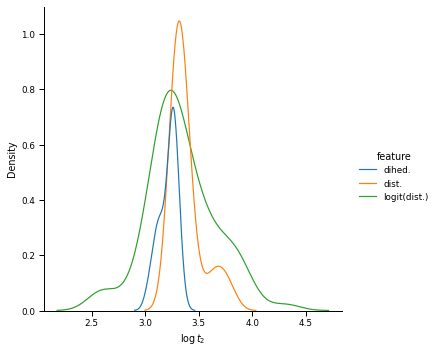

In [69]:
with sns.plotting_context('paper'):
    sns.displot(data=df2, hue='feature', x=r'$\log{t_{2}}$', kind='kde', 
                hue_order=['dihed.', 'dist.','logit(dist.)'])

    plt.savefig(f'../{protein}/timescale_dist_summary.pdf', bbox_inches='tight')